In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
a = pd.read_csv("../기상청공모전/data/derivate_data.csv")

In [5]:
a

,Unnamed: 0,anchor_drag,num,latitude,longitude,sog,cog,hdg,d_lati,d_long,d_d_lati,d_d_long
0,2,0,1001,35.461472,129.439878,0.4,9.6,273.0,0.000312,0.000333,0.000342,0.000342
1,3,0,1001,35.461688,129.439792,0.2,328.0,267.0,0.000216,-0.000086,-0.000096,-0.000096
2,4,0,1001,35.461708,129.439733,0.2,260.1,265.0,0.000020,-0.000059,-0.000196,-0.000196
3,5,0,1001,35.461720,129.439708,0.1,262.8,270.0,0.000012,-0.000025,-0.000008,-0.000008
4,6,0,1001,35.461733,129.439717,0.3,277.6,273.0,0.000013,0.000009,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...
681435,682471,1,4087,35.053083,129.061333,1.3,26.0,97.0,0.000033,0.000016,-0.000017,-0.000017
681436,682472,1,4087,35.053083,129.061333,1.3,29.0,99.0,0.000000,0.000000,-0.000033,-0.000033
681437,682473,1,4087,35.053117,129.061400,1.2,48.0,106.0,0.000034,0.000067,0.000034,0.000034
681438,682474,1,4087,35.053117,129.061417,1.2,52.0,108.0,0.000000,0.000017,-0.000034,-0.000034


In [6]:
a1 = a.iloc[:,1:]

In [7]:
a1

,anchor_drag,num,latitude,longitude,sog,cog,hdg,d_lati,d_long,d_d_lati,d_d_long
0,0,1001,35.461472,129.439878,0.4,9.6,273.0,0.000312,0.000333,0.000342,0.000342
1,0,1001,35.461688,129.439792,0.2,328.0,267.0,0.000216,-0.000086,-0.000096,-0.000096
2,0,1001,35.461708,129.439733,0.2,260.1,265.0,0.000020,-0.000059,-0.000196,-0.000196
3,0,1001,35.461720,129.439708,0.1,262.8,270.0,0.000012,-0.000025,-0.000008,-0.000008
4,0,1001,35.461733,129.439717,0.3,277.6,273.0,0.000013,0.000009,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...
681435,1,4087,35.053083,129.061333,1.3,26.0,97.0,0.000033,0.000016,-0.000017,-0.000017
681436,1,4087,35.053083,129.061333,1.3,29.0,99.0,0.000000,0.000000,-0.000033,-0.000033
681437,1,4087,35.053117,129.061400,1.2,48.0,106.0,0.000034,0.000067,0.000034,0.000034
681438,1,4087,35.053117,129.061417,1.2,52.0,108.0,0.000000,0.000017,-0.000034,-0.000034


In [8]:
# XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

X = a1.iloc[:, 2:]  # 세번째 열부터 마지막 열까지 입력값
y = a1.iloc[:, 0]  # 첫번째 열이 정답열


# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 데이터셋 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost 모델 학습
params = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_rounds = 100  # 반복 횟수 설정

model = xgb.train(params, dtrain, num_rounds)

# 테스트 데이터 예측
y_pred = model.predict(dtest)
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred]

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred_binary)
print("정확도:", accuracy)

정확도: 0.9946803827189481


In [9]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_binary))

0.8639008822977285


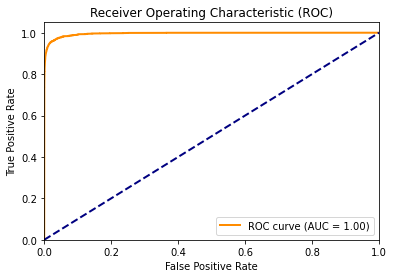

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# XGBoost 모델 예측 확률
y_pred_proba = model.predict(dtest)

# 양성 클래스의 예측 확률 추출
pos_proba = y_pred_proba

# 실제값과 비교할 양성 클래스의 실제 레이블
y_true = np.array(y_test)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_true, pos_proba)
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred_binary)

# CSI 계산
tp = cm[1, 1]  # True Positive
tn = cm[0, 0]  # True Negative
fp = cm[0, 1]  # False Positive
fn = cm[1, 0]  # False Negative

csi = tp / (tp + fn + fp)
print("CSI 점수:", csi)

CSI 점수: 0.7604097818902842
